## **Why Learn Data Visualization?**
If you do any work with data, whether that be through business, machine
learning, or artificial intelligence, you're going to want to know about how to
put together visualizations. Visualizations serve two major purposes in the 
data analysis process.

First of all, visualizations can be used during your initial data exploration 
to help you make insights into your data. Visualizations can reveal patterns in 
the data that statistics alone might not provide. They can also provide an 
intuition about the structure of your data. In addition to answering your 
research questions, visualizations might promote new questions for further 
investigation.

Secondly, visualizations can help you convey your insights to others through 
explanatory plots. By generating new visualizations or polishing and refining 
the plots created during exploration, you can more easily show others what you 
found in your analysis. A good visualization can communicate your findings 
quickly and succinctly.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
pokemon = pd.read_csv('https://raw.githubusercontent.com/thecodescholar/DA_Python_Jun_21/main/Dataset/pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## **Bar Charts:**
A bar chart is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's countplot function:

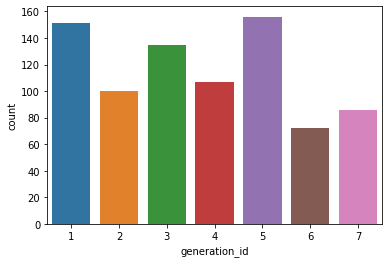

In [ ]:
sb.countplot(data = pokemon, x = 'generation_id')

By default, each category is given a different color. This might come in handy for building associations between these category labels and encodings in plots with more variables. Otherwise, it's a good idea to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color. This can be set using the "color" parameter:

## **Additional Variations**
If you have a lot of category levels, or the category names are long, then you might end up with overcrowding of the tick labels.

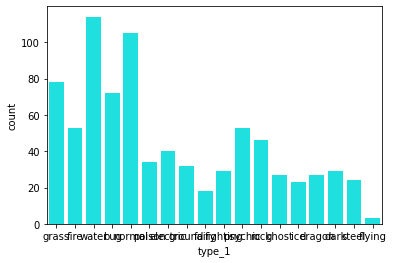

In [ ]:
base_color = sb.color_palette()[2]
sb.countplot(data = pokemon, x = 'type_1', color = 'cyan')

1. one way to deal with it is that, you can use matplotlib's xticks function and its "rotation" parameter to change the orientation in which the labels will be depicted (as degrees counter-clockwise from horizontal):

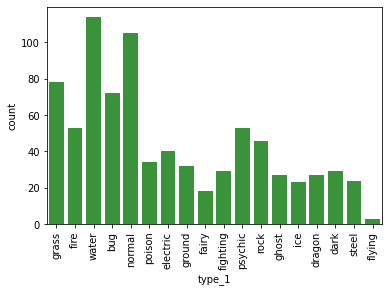

In [ ]:
base_color = sb.color_palette()[2]
sb.countplot(data = pokemon, x = 'type_1', color = base_color)
plt.xticks(rotation=90);

2. Another way to address this is through creation of a horizontal bar chart. In a horizontal bar chart, it is the length of each bar that indicates frequency, rather than the height. In the code, instead of setting the data or variable on the "x" parameter, you can set the variable to be plotted on the parameter "y":

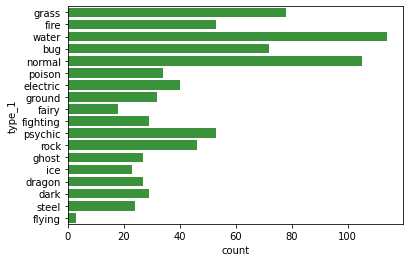

In [ ]:
base_color = sb.color_palette()[2]
sb.countplot(data = pokemon, y = 'type_1', color = base_color)

## **Count Missing Data:**
One interesting way we can apply bar charts is through the visualization of missing data. We can use pandas functions to create a table with the number of missing values in each column.

In [ ]:
pokemon.isna().sum()

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

What if we want to visualize these missing value counts? We could treat the variable names as levels of a categorical variable, and create a resulting bar plot. However, since the data is not in its tidy, unsummarized form, we need to make use of a different plotting function. Seaborn's barplot function is built to depict a summary of one quantitative variable against levels of a second, qualitative variable, but can be used here.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [ ]:
df = pd.read_csv('pokemon.csv')
print(df.shape)
df.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## **Histograms:**

A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number. For instance, using the default settings for matplotlib's hist function:

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

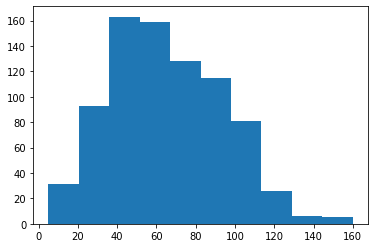

In [ ]:
plt.hist(data = df, x = 'speed')

Overall, a generally bimodal distribution is observed (one with two peaks or humps). The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasize the fact that the data takes on a continuous range of values. When a data value is on a bin edge, it is counted in the bin to its right. The exception is the rightmost bin edge, which places data values equal to the uppermost limit into the right-most bin (to the upper limit's left).

By default, the hist function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data.

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

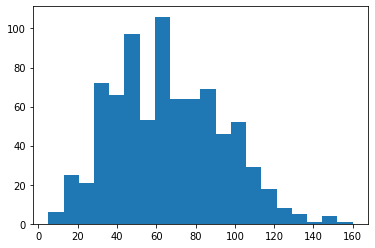

In [ ]:
plt.hist(data = df, x = 'speed', bins = 20)

You can use descriptive statistics (e.g. via df['num_var'].describe()) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's arange function.

The first argument to arange is the leftmost bin edge, the second argument the upper limit, and the third argument the bin width. Note that even though I've specified the "max" value in the second argument, I've added a "+1" (the bin width). That is because arange will only return values that are strictly less than the upper limit. Adding in "+1" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's around if you wanted to approach that end programmatically.

## **Pie Charts:**
A pie chart is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. Frequencies in a pie chart are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken.

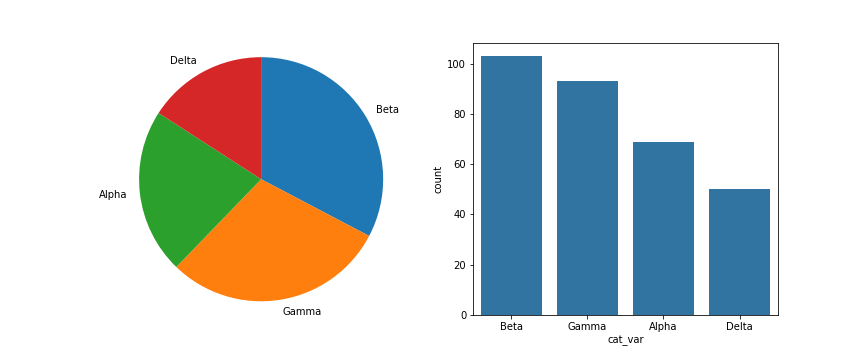

###### Pie chart and barchart displaying the same categorical counts.

Unfortunately, pie charts are a fairly limited plot type in the range of scenarios where they can be used, and it is easy for chart makers to try and spice up pie charts in a way that makes them more difficult to read. If you want to use a pie chart, try to follow certain guidelines:

- Make sure that your interest is in relative frequencies. Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).
- Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.
- Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, a common plotting method is to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.

If these guidelines cannot be met, then you should probably make use of a bar chart instead. A bar chart is a safer choice in general. The bar heights are more precisely interpreted than areas or angles, and a bar chart can be displayed more compactly than a pie chart. There's also more flexibility with a bar chart for plotting variables with a lot of levels, like plotting the bars horizontally.

You can create a pie chart with matplotlib's ```pie``` function. This function requires that the data be in a summarized form: the primary argument to the function will be the wedge sizes.

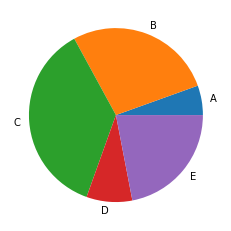

In [6]:
# code for the pie chart seen above
counts_ = [100, 500, 666, 155, 400]
cat_ = ["A", "B", 'C', 'D', 'E']
plt.pie(counts_, labels = cat_);


## **Additional Variation:**

A sister plot to the pie chart is the donut plot. It's just like a pie chart, except that there's a hole in the center of the plot. Perceptually, there's not much difference between a donut plot and a pie chart, and donut plots should be used with the same guidelines as a pie chart. Aesthetics might be one of the reasons why you would choose one or the other. For instance, you might see statistics reported in the hole of a donut plot to better make use of available space.

To create a donut plot, you can add a "wedgeprops" argument to the pie function call. By default, the radius of the pie (circle) is 1; setting the wedges' width property to less than 1 removes coloring from the center of the circle.

(-1.1125381841062172,
 1.1005970563860101,
 -1.1044713886532853,
 1.108663851838942)

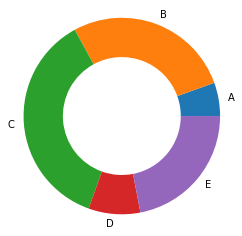

In [12]:
# code for the pie chart seen above
counts_ = [100, 500, 666, 155, 400]
cat_ = ["A", "B", 'C', 'D', 'E']
plt.pie(counts_, labels = cat_,  wedgeprops = {'width' : 0.4})
plt.axis('square')


### Great Job

## All the Best

# THE CODE SCHOLAR